# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ------------------------------------- 293.3/293.3 kB 18.9 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
tips = pd.read_csv(r'./data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

Text(0.5, 0, 'Total Bill')

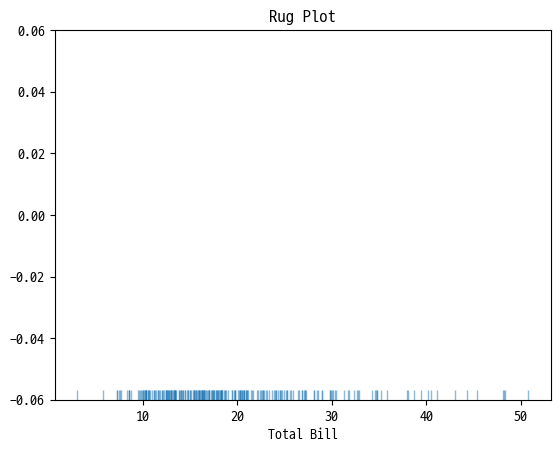

In [8]:
# rugplot : 데이터 위치를 작은 선으로 나타내어 실제 데이터의 분포 시각화
sns.rugplot(x='total_bill', # x=x축에 들어갈 칼럼명, y=y축에 들어갈 칼럼명
            data=tips,      # data=데이터로 사용할 데이터프레임
            alpha=0.5,      # alpha=투명도
            )
plt.title('Rug Plot')       # 타이틀 명등은 plt로 설정
plt.xlabel('Total Bill')

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

<Axes: xlabel='total_bill', ylabel='Density'>

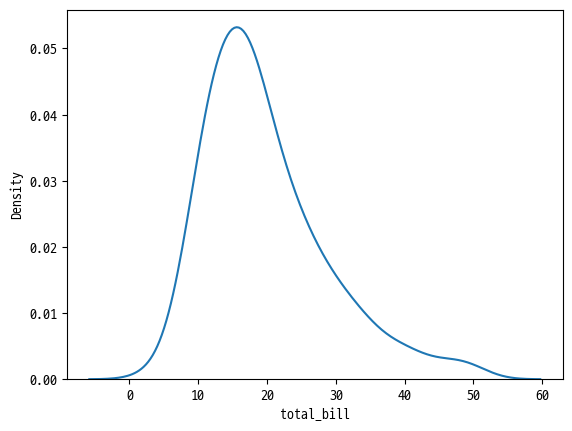

In [10]:
# kdeplot : 커널 밀도 그래프를 부드러운 곡선 형태로 시각화
sns.kdeplot(x='total_bill', # x=x축에 들어갈 칼럼명, y=y축에 들어갈 칼럼명
            data=tips       # data=데이터로 사용할 데이터프레임
            )

## displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

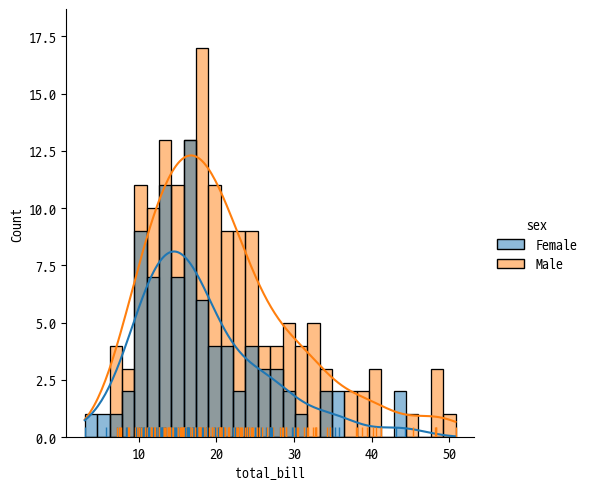

In [28]:
# displot : 히스토그램 그래프를 그릴 수 있음 -> kde나 rug를 함께 그릴 수 있음
sns.displot(data=tips,
            x='total_bill',
            bins=30,        # bins=막대의 갯수
            kde=True,       # kde=커널 밀도 그래프 표시 여부
            rug=True,       # rug=데이터 위치 표시 여부
            hue='sex'       # hue= 범주형 데이터를 기준으로 그룹을 나누어 표현
            )

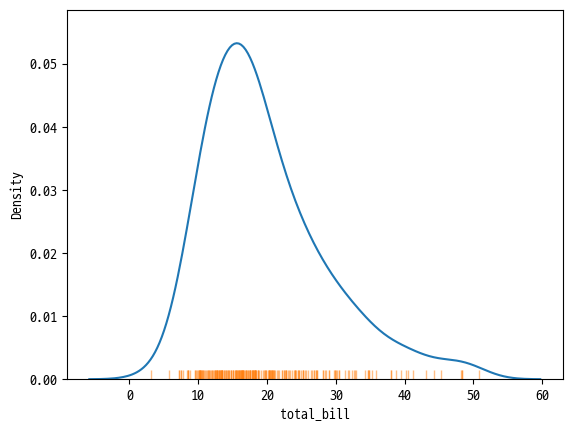

In [27]:
sns.kdeplot(x='total_bill', data=tips)
sns.rugplot(x='total_bill', data=tips, alpha=0.5)
plt.show()
# 여러 그래프를 하나에 표현하고 싶을떄, 여러번 그래프를 그리면 된다.

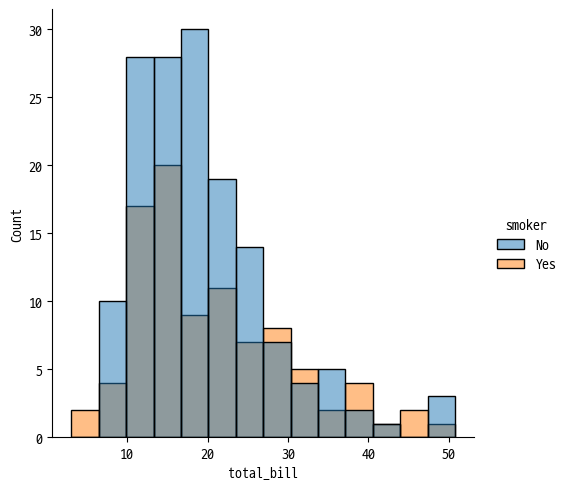

In [26]:
sns.displot(data=tips,
            x='total_bill', 
            hue='smoker',   # hue= 범주형 데이터를 기준으로 그룹을 나누어 표현
                            # 다른 seaborn 그래프에서도 hue를 사용할 수 있다.
            )

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

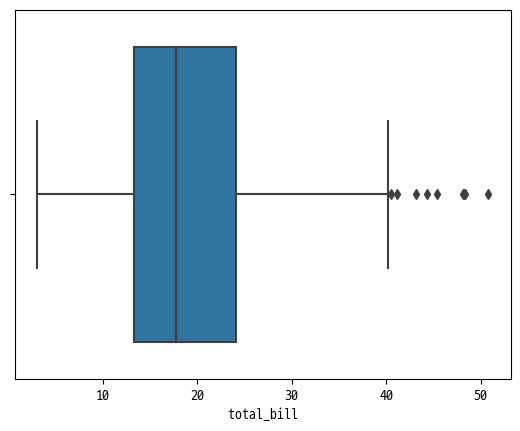

In [4]:
sns.boxplot(data=tips,
            x='total_bill', # x에 지정시 수평으로 표현
            );

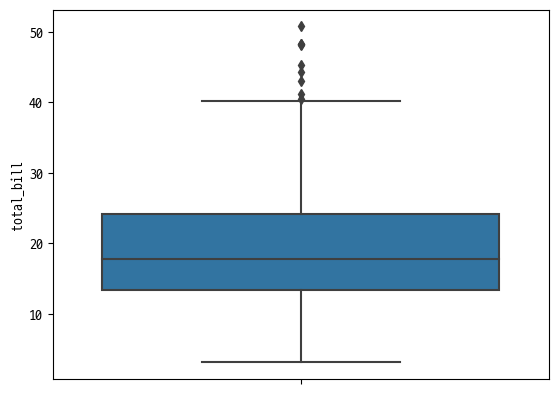

In [6]:
sns.boxplot(data=tips,
            y='total_bill', # y에 지정시 수직으로 표현
            );

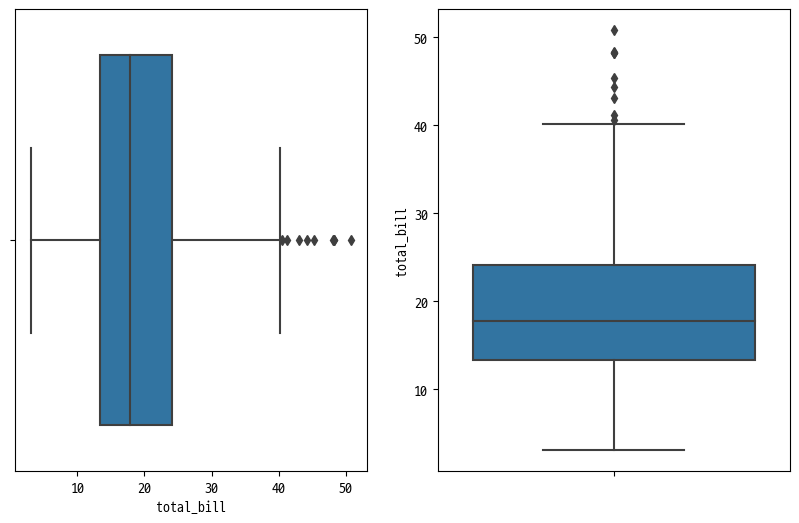

In [7]:
plt.figure(figsize=(10,6)) 
plt.subplot(1,2,1)
sns.boxplot(data=tips,
            x='total_bill', # x에 지정시 수평으로 표현
            );
plt.subplot(1,2,2)
sns.boxplot(data=tips,
            y='total_bill', # y에 지정시 수직으로 표현
            );
# 내부적으로는 matplotlib를 사용하기 때문에 plt를 사용할 수 있다.

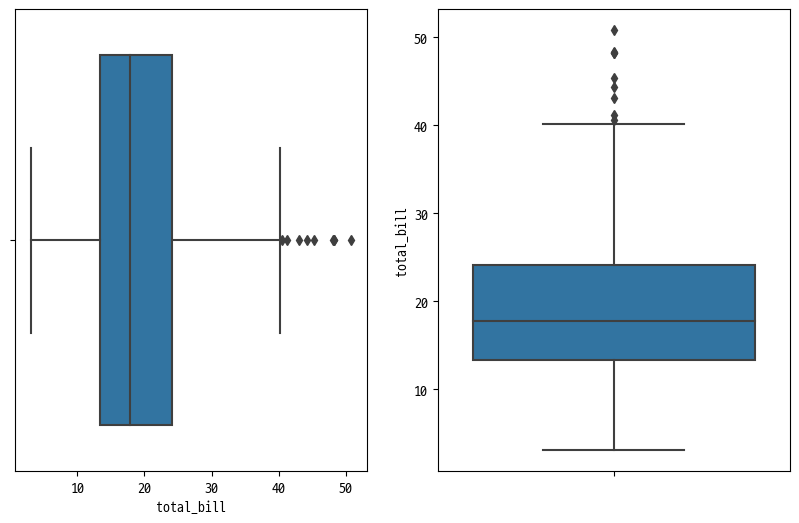

In [6]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(data=tips, x='total_bill', ax=ax1)
sns.boxplot(data=tips, y='total_bill', ax=ax2)
# 객체지향 방식으로도 사용할 수 있다.
# ax인자에 그래프를 그릴 axes 객체를 지정한다.
plt.show()

<Axes: xlabel='total_bill', ylabel='sex'>

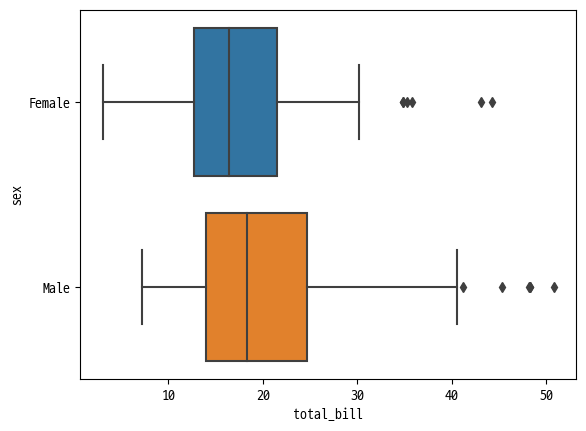

In [10]:
sns.boxplot(data=tips,
              x='total_bill',
              y='sex',
              )
# 성별에 따른 total_bill의 분포를 확인할 수 있다.

<Axes: xlabel='total_bill', ylabel='sex'>

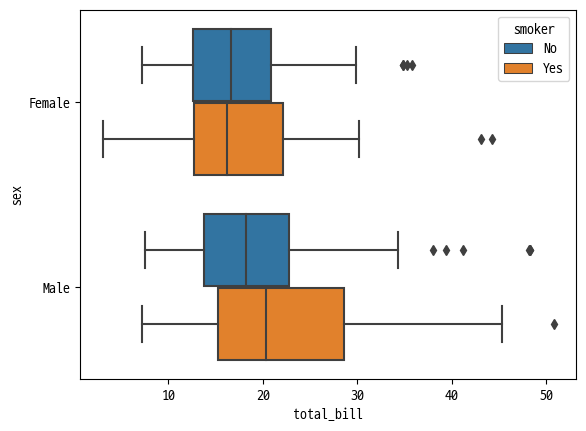

In [12]:
sns.boxplot(data=tips,
              x='total_bill',
              y='sex',
              hue='smoker'
              )
# hue를 사용하면 성별과 흡연여부에 따른 total_bill의 분포를 확인할 수 있다.

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

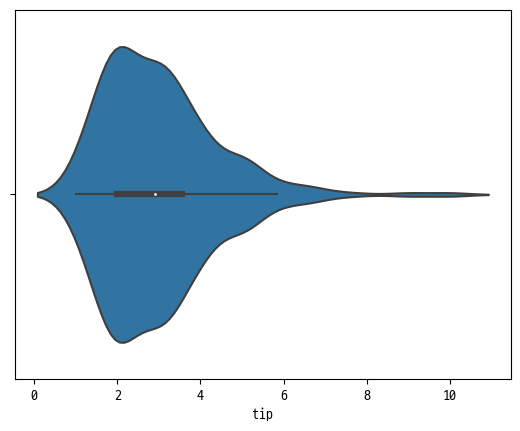

In [19]:
# violinplot : boxplot과 비슷하지만 커널 밀도 히스토그램을 같이 표시한다.
sns.violinplot(data=tips,
                x='tip',
                );

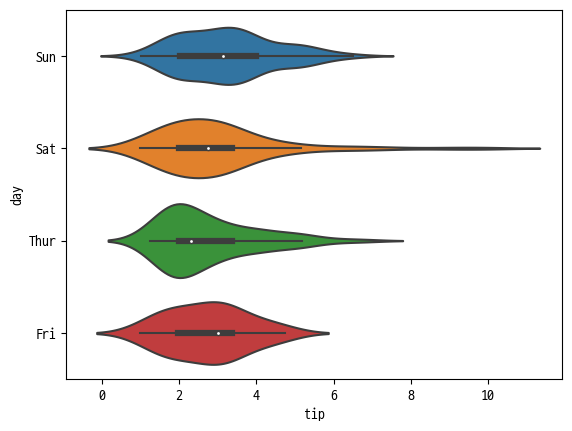

In [18]:
sns.violinplot(data=tips,
                x='tip',
                y='day'
                );

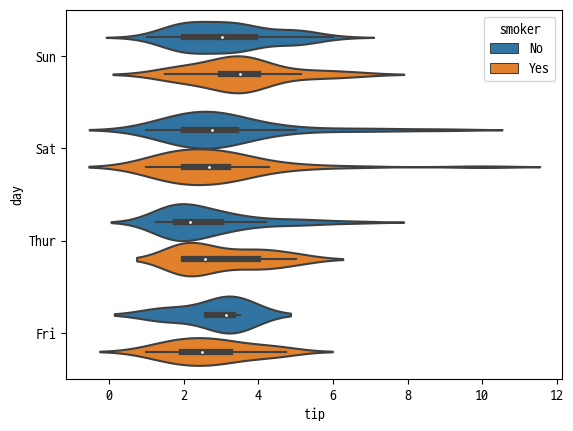

In [17]:
sns.violinplot(data=tips,
                x='tip',
                y='day',
                hue='smoker',
                );

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


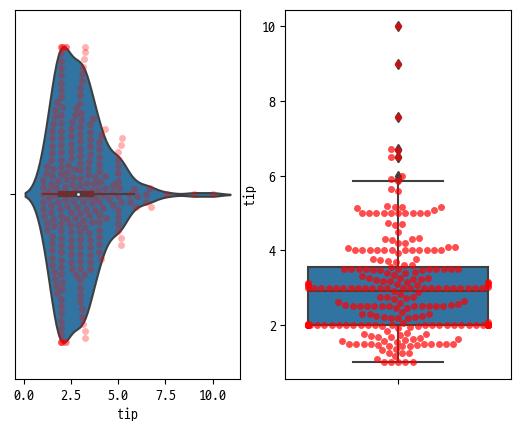

In [39]:
# swarmplot : 데이터가 중복되지 않게 그래프 위에 산점도를 표시한다.
plt.subplot(1,2,1)
sns.swarmplot(data=tips,
                x='tip',
                color='r',
                alpha=0.3,
                )
sns.violinplot(data=tips,
                x='tip',
                )
plt.subplot(1,2,2)
# swarmplot : 데이터가 중복되지 않게 그래프 위에 산점도로 표시한다.
sns.swarmplot(data=tips,
                y='tip',
                color='r',
                alpha=0.7,
                )
sns.boxplot(data=tips,
                y='tip',
                )
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

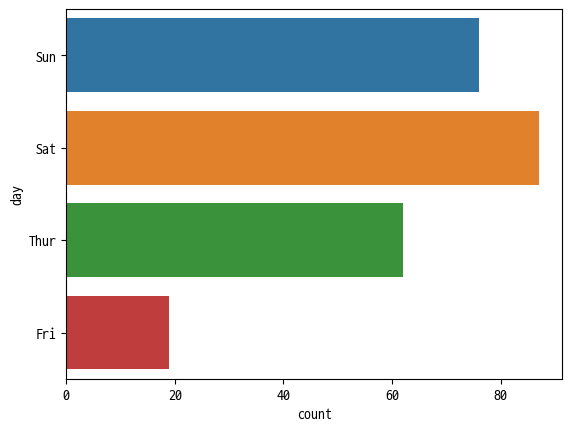

In [42]:
# countplot : 각 카테고리 값별로 데이터가 얼마나 있는지 표시하는 그래프
sns.countplot(data=tips,
            y='day',
            );

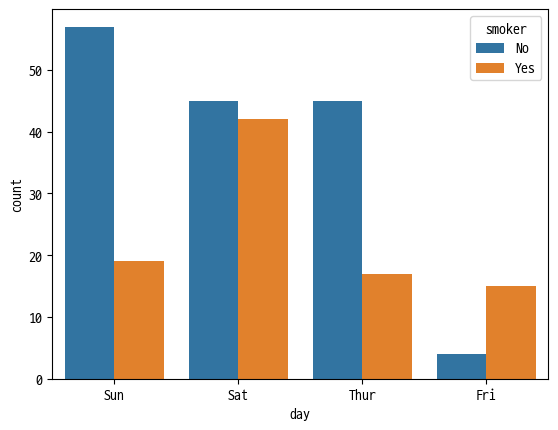

In [44]:
sns.countplot(data=tips,
            x='day',        # x축을 지정할 경우 y축은 높이가 되기 때문에 다른 범주형 데이터를 y축에 지정할 수 없다.
            hue='smoker'
            );

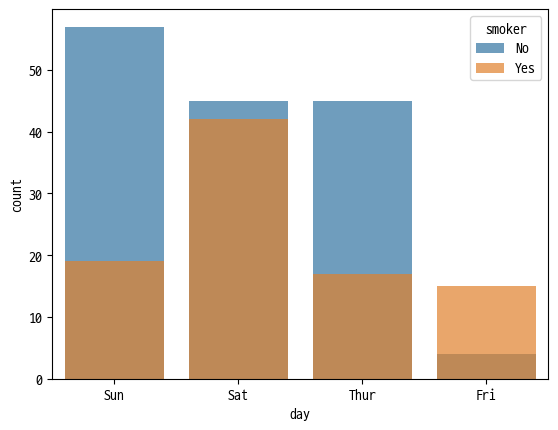

In [50]:
sns.countplot(data=tips,
            x='day',        # x축을 지정할 경우 y축은 높이가 되기 때문에
                            # 다른 범주형 데이터를 y축에 지정할 수 없다.
            hue='smoker',
            dodge=False,     # dodge=False를 지정하면 hue를 지정한 모든 데이터를 
                            # 겹쳐서 표현한다.
            alpha=0.7,
            );

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

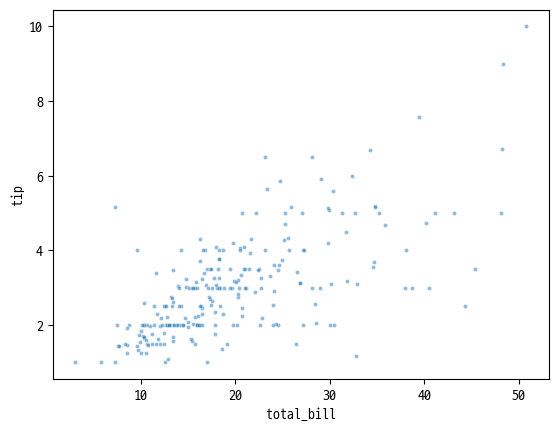

In [60]:
# scatterplot : 산점도를 그리는 그래프
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                alpha=0.5,
                marker='.',
                );

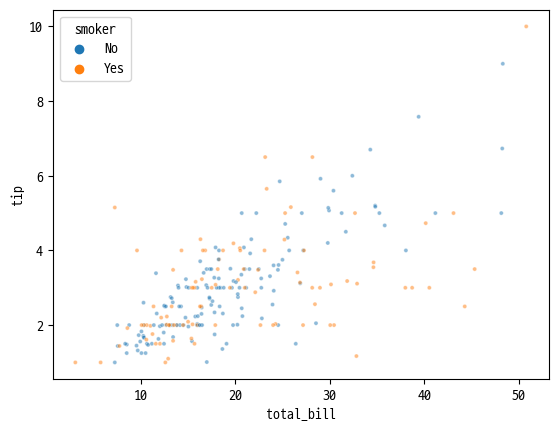

In [59]:
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                hue='smoker',
                alpha=0.5,
                marker='.',
                );

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)